In [ ]:
GoldPrice Precdiction( LinearRegression)sangareshwari

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
saldf = pd.read_csv('/content/drive/MyDrive/annual_gold_rate.csv')

In [ ]:
saldf.head()

,Date,USD,EUR,GBP,INR,AED,CNY
0,1980-12-31,614.50,378.19461,263.80259,4831.74943,2278.36795,NaN
1,1981-12-31,459.26,360.90588,227.01948,3966.64790,1691.03194,NaN
2,1982-12-31,375.30,345.59742,215.53232,3553.62680,1378.72895,NaN
3,1983-12-30,423.66,439.89318,279.24936,4270.42821,1557.45790,NaN
4,1984-12-31,360.78,425.91000,269.81553,4067.60433,1324.72272,NaN


In [ ]:
saldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    43 non-null     object 
 1   USD     43 non-null     float64
 2   EUR     43 non-null     float64
 3   GBP     43 non-null     float64
 4   INR     43 non-null     float64
 5   AED     43 non-null     float64
 6   CNY     38 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.5+ KB


In [ ]:
saldf.dropna(inplace=True)

In [ ]:
saldf.isnull().sum()

,0
Date,0
USD,0
EUR,0
GBP,0
INR,0
AED,0
CNY,0


In [ ]:
saldf.dropna(inplace=True)

In [ ]:
saldf['Year'] = pd.to_datetime(saldf['Date']).dt.year
inp = saldf[['Year']]
out = saldf['USD']

In [ ]:
LR=LinearRegression()

In [ ]:
LR.fit(inp,out)

LinearRegression()

In [ ]:
LR.predict([[5]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-81477.85754349])

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler_inp = StandardScaler()
inp_scaled = scaler_inp.fit_transform(inp)
scaler_out = StandardScaler()
out_scaled = scaler_out.fit_transform(out.values.reshape(-1, 1))
print("Original 'Year' (first 5):")
print(inp.head())
print("\nScaled 'Year' (first 5):")
print(inp_scaled[:5])
print("\nOriginal 'USD' (first 5):")
print(out.head())
print("\nScaled 'USD' (first 5):")
print(out_scaled[:5])

Original 'Year' (first 5):
   Year
5  1985
6  1986
7  1987
8  1988
9  1989

Scaled 'Year' (first 5):
[[-1.68705478]
 [-1.59586263]
 [-1.50467048]
 [-1.41347833]
 [-1.32228618]]

Original 'USD' (first 5):
5    317.30
6    367.85
7    446.22
8    436.86
9    380.82
Name: USD, dtype: float64

Scaled 'USD' (first 5):
[[-0.87922394]
 [-0.78250268]
 [-0.63255123]
 [-0.65046045]
 [-0.75768616]]


In [ ]:
inp_decoded = scaler_inp.inverse_transform(inp_scaled)
out_decoded = scaler_out.inverse_transform(out_scaled)
print("Decoded 'Year' (first 5) - should match original:")
print(inp_decoded[:5])
print("\nDecoded 'USD' (first 5) - should match original:")
print(out_decoded[:5])

Decoded 'Year' (first 5) - should match original:
[[1985.]
 [1986.]
 [1987.]
 [1988.]
 [1989.]]

Decoded 'USD' (first 5) - should match original:
[[317.3 ]
 [367.85]
 [446.22]
 [436.86]
 [380.82]]


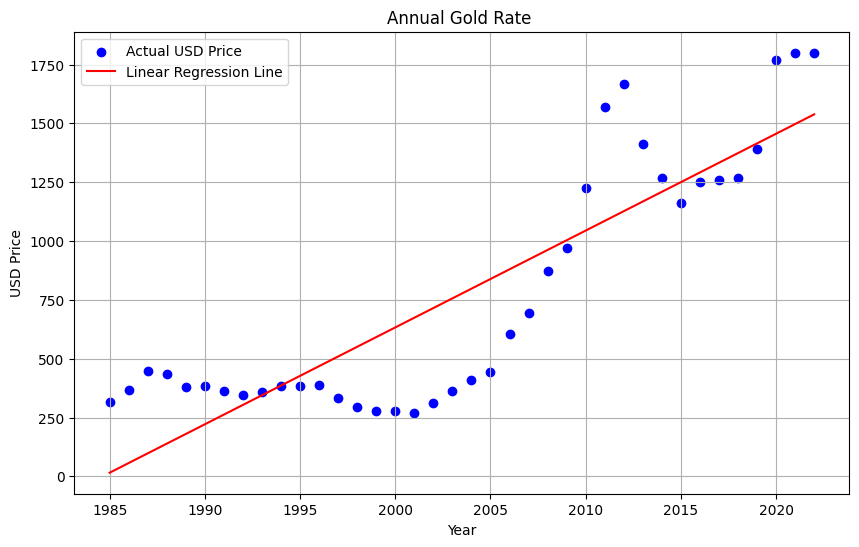

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(inp, out, color='blue', label='Actual USD Price')
plt.plot(inp, LR.predict(inp), color='red', label='Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('USD Price')
plt.title('Annual Gold Rate ')
plt.legend()
plt.grid(True)
plt.show()